In [1]:
import pandas as pd
from pandas._libs.tslibs.timestamps import Timestamp
import datetime
import random

In [2]:
clients = pd.read_csv('../datasets/clients.csv')
items = pd.read_csv('../datasets/items.csv')

In [3]:
clients

,client_id,name,gender,dob,email,phone,channel,first_contact,lat,lon,location_name,created_at
0,100000000,Kaushal Bashyal,Male,2003-03-14,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,27.7768,85.3622,Golfutar Main Rd,2020-09-01 10:48:09.763278
1,100000001,Sona Hayanju,Female,1996-07-03,sona.hayanju@fakeemail.com,9841685812,Other,browser,27.6954,85.3447,ACE Institute Of Management,2020-09-01 11:46:03.489814
2,100000002,Suman Pokherel,Male,2005-08-04,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,27.6590,85.3680,Changathali Rd,2020-09-01 14:05:06.316626
3,100000003,Samita Yogol,Female,2001-08-22,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,27.7126,85.2830,Ring Road,2020-09-01 20:56:28.775488
4,100000004,Mahima Marasaini,Female,1985-03-20,mahima.marasaini@fakeemail.com,9841859344,Other,app,27.7137,85.3245,Bhagawati Marg,2020-09-01 16:06:58.593803
...,...,...,...,...,...,...,...,...,...,...,...,...
21638,100021638,Bibek Barakoti,Male,1999-10-05,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,27.6787,85.3103,Jhamsikhel Marg,2021-08-31 21:01:37.440162
21639,100021639,Ansu Huzdar,Female,2004-03-30,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,27.7305,85.3405,Banshidhar Marg,2021-08-31 01:11:26.657379
21640,100021640,Sumit Sanjel,Male,1997-07-11,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,27.7206,85.3194,Kumari Mai Marg,2021-08-31 20:41:11.488311
21641,100021641,Prapti Mushyakhow,Female,2006-05-08,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,27.7351,85.3056,Gongabu New Buspark,2021-08-31 18:17:39.263566


In [4]:
items

,item_id,item_name,price,category,image_url,inventory
0,10000,iPhone 12 (256GB),152900,Phone,https://dummyimage.com/600x400/000/fff&text=iP...,36
1,10001,"VivoBook 14 X415JA (14” FHD, Intel i7-1065G7, ...",115000,Laptop,https://dummyimage.com/600x400/000/fff&text=Vi...,39
2,10002,"Helios 300 2020 (15.6″ FHD 144Hz, Core i7-1075...",190000,Laptop,https://dummyimage.com/600x400/000/fff&text=He...,27
3,10003,Sony Alpha A6500 (With 18-135mm zoom lens),245000,Camera,https://dummyimage.com/600x400/000/fff&text=So...,71
4,10004,iPhone SE 2 (256GB),96000,Phone,https://dummyimage.com/600x400/000/fff&text=iP...,24
...,...,...,...,...,...,...
286,10286,Poco F3 (6+128GB),46999,Phone,https://dummyimage.com/600x400/000/fff&text=Po...,88
287,10287,Oppo F17 (6+128GB),33990,Phone,https://dummyimage.com/600x400/000/fff&text=Op...,15
288,10288,Galaxy A12 (4+64GB),18999,Phone,https://dummyimage.com/600x400/000/fff&text=Ga...,60
289,10289,Oppo F19 (6+128GB),34590,Phone,https://dummyimage.com/600x400/000/fff&text=Op...,48


## Add trend and seasonality

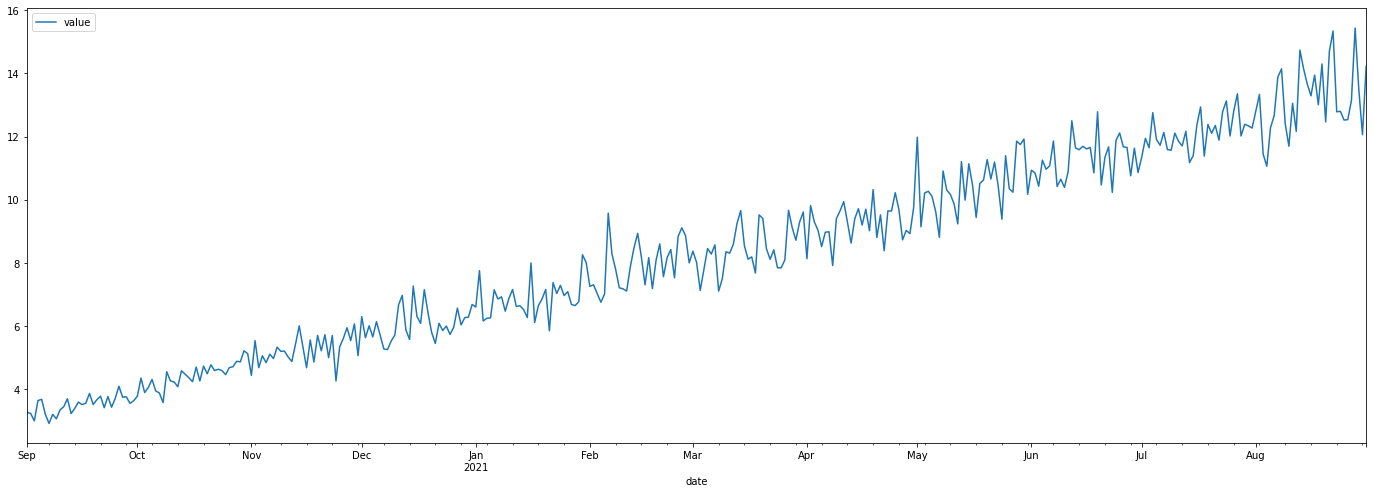

In [5]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor, HolidayFactor

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=10.0, offset=2., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.05, 5: 1.1, 6: 1.05}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [6]:
data = g.generate()

In [7]:
data['rows'] = (2*data.value).astype(int)

In [8]:
data = data[['date', 'rows']]

<AxesSubplot:xlabel='date'>

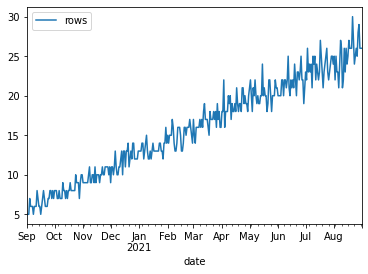

In [9]:
data.set_index('date').plot()

In [10]:
data

,date,rows
0,2020-09-01,5
1,2020-09-02,5
2,2020-09-03,5
3,2020-09-04,7
4,2020-09-05,6
...,...,...
360,2021-08-27,28
361,2021-08-28,29
362,2021-08-29,26
363,2021-08-30,26


In [11]:
## holiday: dashain, christmas/new year, valentines day
## major promotion campain with sisan baniya, multiple tech channels, facebook promo etc
## 

In [12]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = int (num*1.1)
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = int (num*1.2)
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = int (num*1.1)
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 1.2)
    return num

In [13]:
data['rows'] = data.apply(nepali_holiday, axis=1)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_96127/2206892774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rows'] = data.apply(nepali_holiday, axis=1)


<AxesSubplot:xlabel='date'>

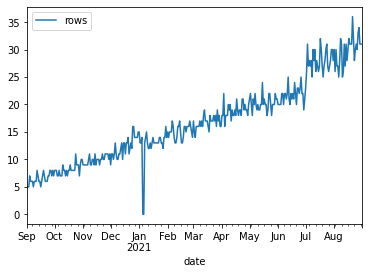

In [14]:
data.set_index('date').plot()

In [15]:
data

,date,rows
0,2020-09-01,5
1,2020-09-02,5
2,2020-09-03,5
3,2020-09-04,7
4,2020-09-05,6
...,...,...
360,2021-08-27,33
361,2021-08-28,34
362,2021-08-29,31
363,2021-08-30,31


In [16]:
def create_list(row):
    return [str(row.date)]*row.rows

In [17]:
df = pd.DataFrame({'created_at': data.apply(create_list, axis=1).sum()})

In [18]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return datetime.datetime.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [19]:
df['created_at'] = df['created_at'].apply(random_times)

<AxesSubplot:xlabel='created_at'>

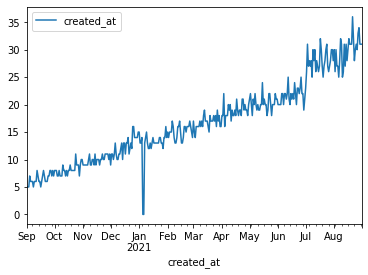

In [20]:
df.resample('D', on='created_at').count().plot()

In [21]:
df

,created_at
0,2020-09-01 00:38:50.403264
1,2020-09-01 00:53:51.983191
2,2020-09-01 09:49:12.285421
3,2020-09-01 16:44:09.888896
4,2020-09-01 22:40:07.678792
...,...
6082,2021-08-31 21:25:25.914975
6083,2021-08-31 02:01:14.664119
6084,2021-08-31 02:30:22.605617
6085,2021-08-31 21:23:18.842280


In [22]:
df.to_csv('../datasets/transactions_raw.csv', index=False)